<a href="https://colab.research.google.com/github/catfishona/obesity-classification/blob/main/Decisiont_Tree_Obesity_Classification_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Besar**
## EDA & Decision Tree Classification Model with Obesity Classification Dataset

---

1972034 - Leona Rose

1972042 - Neng Linda Rahayu





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
d = pd.read_csv('obesity-classification.csv')

## **1. Understanding & Preparing Data**



In [ ]:
d.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [ ]:
d.columns

Index(['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')

## **1.1 Problem Statement & Objective**


Objektif utama adalah melakukan klasifikasi obesitas menggunakan Decision Tree Classification

*  Atribut apa saja yang paling mempengaruhi hasil dari kategori obesitas?
*  Apakah model machine learning dapat mengklasifikasi individu dengan kategori obesitas secara akurat?
* Seberapa akurat menggunakan Decision Tree Classification dalam dataset Obesity Classification?



## **2. Exploratory Data Analysis (EDA) / Data Visualization**


Memvisualisasikan distribusi feature values

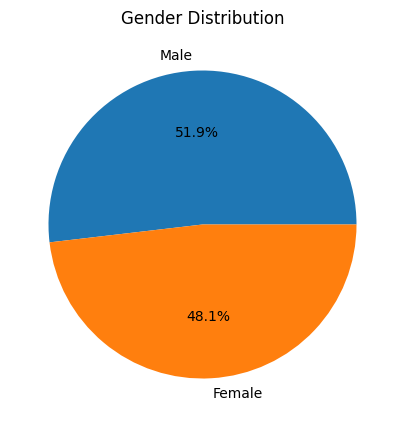

In [ ]:
# melihat distribusi "Gender" pada dataset

plt.figure(figsize=(8,5))

plt.title('Gender Distribution')
vals = d['Gender'].value_counts().values
labels = ['Male', 'Female']

plt.pie(vals, labels=labels, autopct='%1.1f%%')

plt.show()

<Axes: >

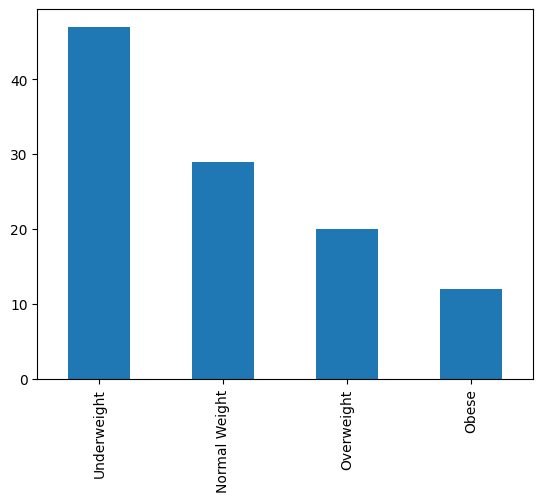

In [ ]:
# menggunakan bar char untuk melihat distribusi "Obesity Classification" / feature "Label"

d['Label'].value_counts().plot(kind='bar')

### Encoding data

In [ ]:
# data perlu di encode agar value dengan tipe data "Object" diubah menjadi numerical value
# agar lebih mudah di proses oleh Machine Learning Model

obj_cols = d.select_dtypes(include=['object']).columns.tolist()
print(obj_cols)

['Gender', 'Label']


In [ ]:
le = LabelEncoder()

for obj in obj_cols:
    le.fit(d[obj])
    d[obj] = le.transform(d[obj])

# feature yang sebelumnya memiliki data type "Object" berubah menjadi "int"
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    int64  
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 6.0 KB


In [ ]:
d.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,0
1,2,30,0,160,60,22.5,0
2,3,35,1,180,90,27.3,2
3,4,40,0,150,50,20.0,3
4,5,45,1,190,100,31.2,1


In [ ]:
# arti dari values yang telah di encode pada cell sebelumnya:

decoded_labels = {
    0: "Normal Weight",
    1: "Obese",
    2: "Overweight",
    3: "Underweight"
}

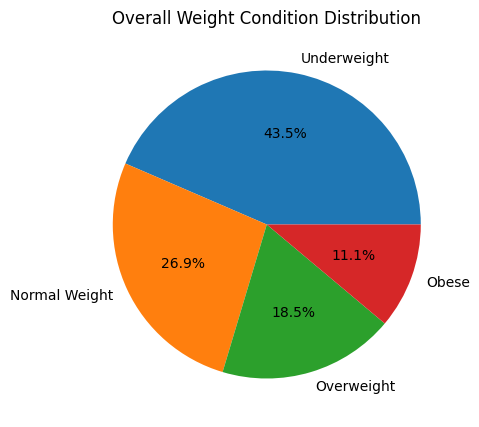

In [ ]:
# melihat distribusi "Obesity Classification" secerah keseluruhan

plt.figure(figsize=(8,5))

# 0 = Normal Weight
# 1 = Obese
# 2 = Overweight
# 3 = Underweight

plt.title('Overall Weight Condition Distribution')
class_count = d['Label'].value_counts()
vals = class_count.values
labels = class_count.index.tolist()
string_labels = [decoded_labels[label] for label in labels]

plt.pie(vals, labels=string_labels, autopct='%1.1f%%')

plt.show()

---
Membaca hubungan antar feature values dan target values secara keseluruhan




In [ ]:
cols_to_plot = ['Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label']
d[cols_to_plot].corr()

,Age,Gender,Height,Weight,BMI,Label
Age,1.000000,-0.091964,-0.076896,0.465106,0.474185,-0.134396
Gender,-0.091964,1.000000,0.876225,0.418415,0.342342,-0.281647
Height,-0.076896,0.876225,1.000000,0.428890,0.354340,-0.237683
Weight,0.465106,0.418415,0.428890,1.000000,0.972829,-0.565555
BMI,0.474185,0.342342,0.354340,0.972829,1.000000,-0.589237
Label,-0.134396,-0.281647,-0.237683,-0.565555,-0.589237,1.000000


Memvisualisasikan hubungan antar feature values dan target values secara keseluruhan (hasil output pada cell sebelumnya)

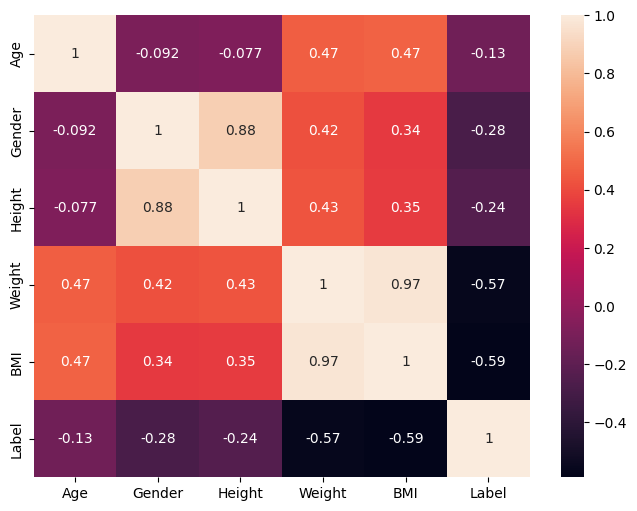

In [ ]:
plt.figure(figsize=(8,6))
hm = sns.heatmap(d[cols_to_plot].corr(), annot=True)

**Berdasarkan heatmap diatas, dapat disimpulkan bahwa:**

High correlation 🟢
*  BMI <-> Weight
*  Height <-> Gender

Fair correlation 🟡
* Weight <-> Age, Gender, Height
* BMI <-> Age
* Age <-> Weight, BMI
* Gender <-> Weight
* Height <-> Weight

Little correlation 🟠
* BMI <-> Gender, Height
* Gender <-> BMI
* Height <-> BMI



---



Memvisualisasikan hubungan antar feature values dan target values berdasarkan "Gender"

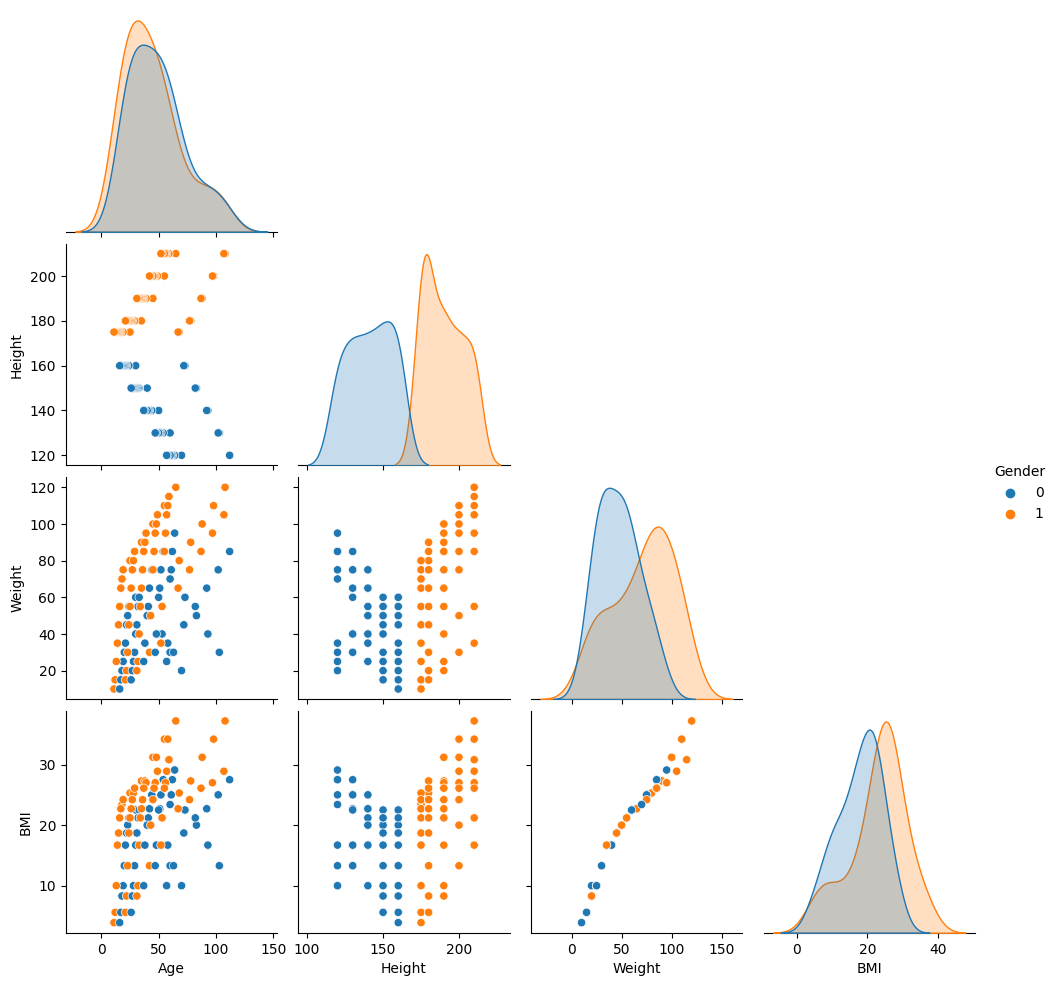

In [ ]:
# female : 0 (biru)
# male : 1 (orange)

features = ['Age', 'Height', 'Weight', 'BMI']
sns.pairplot(d, vars=features, hue='Gender', corner=True)

**Berdasarkan pairplot diatas, dapat disimpulkan bahwa:**

* Berat badan yang lebih besar -> lebih tinggi BMI yang dimiliki
* Mayoritas laki-laki lebih tinggi
* Mayoritas perempuan memiliki berat badan yang lebih kecil & tinggi badan yang lebih pendek


Yang memiliki hubungan:
* Weight & BMI (high correlation🟢; terlihat dari plot yang berbentuk linear menuju kanan atas)
* Age & Weight (fair correlation🟡; terlihat dari plot yang berpapasan dan secara gambaran besar berbentuk menuju ke kanan atas)
* Age & BMI (fair correlation🟡)


Yang tidak memiliki hubungan:
*Terlihat dari plot yang tidak berpapasan*
* Height & Weight
* Height & BMI
* Age & Height
* Gender & BMI

---




## Data Modelling dengan Decision Tree Classification

### **Preprocessing data**

Menghapus data yang tidak penting / dapat menghasilkan error



In [ ]:
# column ID tidak penting dalam membuat model / prediksi

d.drop('ID', axis=1, inplace=True)

In [ ]:
# membagi dataset dalam variable X dan y; X menampung independent attributes dan y menampung dependent attributes (labels)

X = d.drop(["Label"],axis=1)
y = d["Label"]

# splitting the datasets into test and training samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Making the model:**

In [ ]:
# training the data
# initialize model
dtc = DecisionTreeClassifier()

# train the model
dtc.fit(X_train, y_train)

# predict labels for the test data
y_pred = dtc.predict(X_test)

## **Evaluating the model**

In [ ]:
# menggunakan accuracy score metric

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
# menggunakan classification report metric
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         8

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



Accuracy score bernilai 1 ➡ berarti model **`cocok`** digunakan dengan dataset yang dipilih


---



## **Evaluating the trained model**


In [ ]:
X_train.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'BMI'], dtype='object')

In [ ]:
# new_data merupakan variable yang menampung test values yang digunakan untuk memprediksi Obesity Classification
# yang akan dihasilkan (normal, obese, overweight, underweight) yang dihasilkan

new_data = [[30, 1, 180, 20, 27.3], [60, 1, 170, 55, 20]]
preds = dtc.predict(new_data)
preds

# 0 = Normal Weight
# 1 = Obese
# 2 = Overweight
# 3 = Underweight

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([3, 0])

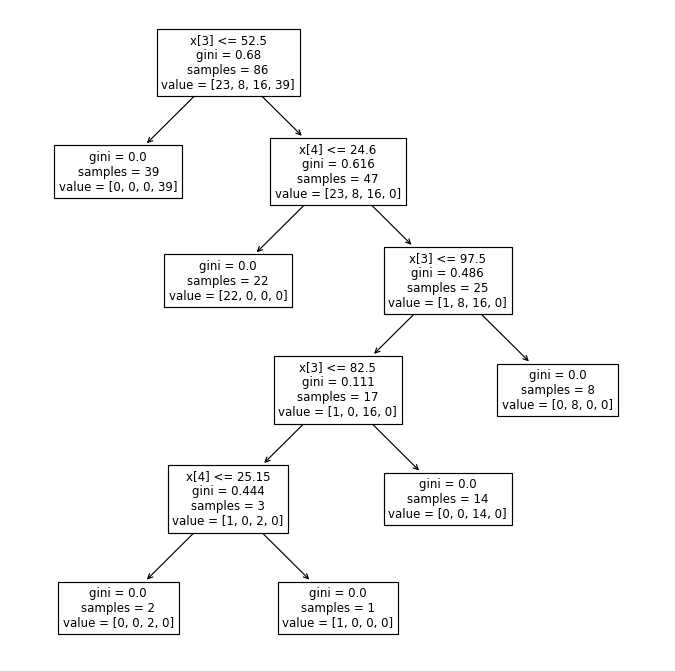

In [ ]:
plt.rcParams['figure.dpi'] = 85
plt.subplots(figsize=(10, 10))
tree.plot_tree(dtc, fontsize=10)
plt.show()